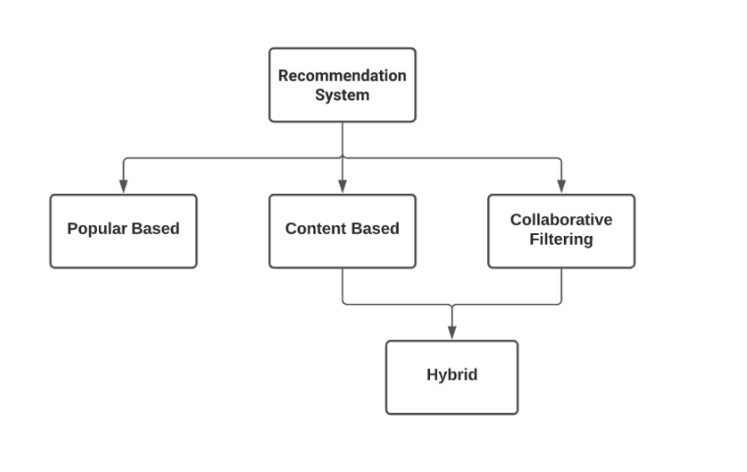

POPULARITY BASED

This is the baseline performance and the most intuitive recommendation that we can find anywhere. Examples are the IMDB top-rated movies, Top 10 in your country today in Netflix, etc. These recommendations can be found when you are a new joiner and the provider doesn't have enough information about you. So it would be a safe bet to recommend to you what others like.

❗ Limitation: All users get the same recommendation set. It's not personalized.

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read in the data

anime_df = pd.read_csv("/content/drive/MyDrive/anime.csv")
rating_df = pd.read_csv("/content/drive/MyDrive/rating.csv")

In [4]:
anime_df.rename(columns = {'rating':'mean_rating'}, inplace = True)

In [5]:
# Changing NaN values of ratings to 0.0

anime_df.loc[anime_df['mean_rating'].isna(), 'mean_rating'] = 0.0
anime_df['mean_rating'].isnull().any()

False

In [6]:
# Merging the 2 datasets

df_merged = pd.merge(rating_df,anime_df,on='anime_id')

In [7]:
df_merged.head()

,user_id,anime_id,rating,name,genre,type,episodes,mean_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
1,3,20,8,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
2,5,20,6,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297


In [8]:
# Checking for -1 rating

df_merged.loc[df_merged['rating'] == -1]

,user_id,anime_id,rating,name,genre,type,episodes,mean_rating,members
0,1,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
3,6,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
4,10,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
15,54,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
23,90,20,-1,Naruto,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,220,7.81,683297
...,...,...,...,...,...,...,...,...,...
7813701,57950,33884,-1,Tokyu Plaza Ginza Open,Slice of Life,Special,1,5.00,45
7813704,60978,29135,-1,Chiisana Teien,"Adventure, Fantasy",Movie,1,5.91,151
7813706,62175,28579,-1,Kyoro-chan no Jishin Youjin Hi no Youjin,"Drama, Fantasy, Kids",OVA,1,6.88,69
7813724,70463,29481,-1,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61


In [9]:
# Removing -1 rating
df_merged_filtered = df_merged[df_merged['rating'] != -1]

In [10]:
# Average rating of products
ratings = pd.DataFrame() #merged_df.groupby('anime_id')['rating'].mean()
ratings['ratings_count'] = pd.DataFrame(df_merged_filtered.groupby('anime_id')['rating'].count())
ratings['ratings_average'] = pd.DataFrame(df_merged_filtered.groupby('anime_id')['rating'].mean())

ratings = ratings.reset_index()
ratings.head(10)

,anime_id,ratings_count,ratings_average
0,1,13449,8.869433
1,5,5790,8.439724
2,6,9385,8.419393
3,7,2169,7.533426
4,8,308,7.198052
5,15,2002,8.299700
6,16,3291,8.364935
7,17,528,8.043561
8,18,1510,8.311258
9,19,4079,8.921304


In [11]:
ratings.loc[ratings['anime_id'] == 20]

,anime_id,ratings_count,ratings_average
10,20,22071,7.893888


Develop Recommendation System using Popular-Based method

Weighted rating systems used to score the rating of each movie. Here is the formula of the weighted rating score.

WR = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C

R is the average rating for the item.

v is the number of votes for the item.

m is the minimum votes required to be listed in the popular items(defined by > percentile 95 of total votes)

C is the average rating across the whole dataset.

In [14]:
ratings_counts = ratings[ratings['ratings_count'].notnull()]['ratings_count']#.astype('int')
ratings_averages = ratings[ratings['ratings_average'].notnull()]['ratings_average']#.astype('int')
C = ratings_averages.mean()
print("Average rating of product across the whole dataset is",C)

Average rating of product across the whole dataset is 6.63770198921587


In [15]:
ratings.shape

(9926, 3)

In [16]:
# Taking 95 percentile

m = ratings_counts.quantile(0.95)
print("Minimum votes required to be listed in the chart is",m)

Minimum votes required to be listed in the chart is 3348.25


In [17]:
qualified = ratings[(ratings['ratings_count'] >= m) & (ratings['ratings_count'].notnull()) 
& (ratings['ratings_average'].notnull())][['anime_id','ratings_count', 'ratings_average']]

qualified.head()

,anime_id,ratings_count,ratings_average
0,1,13449,8.869433
1,5,5790,8.439724
2,6,9385,8.419393
9,19,4079,8.921304
10,20,22071,7.893888


In [18]:
qualified['ratings_count'] = qualified['ratings_count'].astype('int')
qualified['ratings_average'] = qualified['ratings_average'].astype('int')
qualified.head().sort_values(by='ratings_count', ascending=False)

,anime_id,ratings_count,ratings_average
10,20,22071,7
0,1,13449,8
2,6,9385,8
1,5,5790,8
9,19,4079,8


In [19]:
# Calculate weighted rating

def weighted_rating(x):
    v = x['ratings_count']
    R = x['ratings_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [20]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)

In [21]:
qualified.head()

,anime_id,ratings_count,ratings_average,wr
0,1,13449,8,7.728449
1,5,5790,8,7.500855
2,6,9385,8,7.641779
9,19,4079,8,7.385868
10,20,22071,7,6.952278


In [22]:
qualified = qualified.sort_values('wr', ascending=False)

In [23]:
qualified.head(10)

,anime_id,ratings_count,ratings_average,wr
3936,5114,21494,9,8.681608
2642,2904,21124,9,8.676795
5517,9253,17151,9,8.614153
3508,4181,15518,9,8.580756
6202,11061,7477,9,8.269341
831,918,4264,9,7.960943
1388,1535,34226,8,7.878605
6323,11757,26310,8,7.846204
7059,16498,25290,8,7.840726
1426,1575,24126,8,7.833979


In [24]:
df_popular = pd.merge(qualified,df_merged[['anime_id','name','genre','type','members','episodes']],on='anime_id',how='inner')

In [25]:
df_popular = df_popular.drop_duplicates()

In [26]:
# Finding top 10 romance-comedy anime

filter_genre = (df_popular['genre'].str.contains("romance", case=False) & 
                df_popular['genre'].str.contains("comedy", case=False))
filtered = df_popular[filter_genre].sort_values(by=['wr'], ascending=False)
filtered = filtered.head(10)
filtered

,anime_id,ratings_count,ratings_average,wr,name,genre,type,members,episodes
306448,4224,20837,8,7.811401,Toradora!,"Comedy, Romance, School, Slice of Life",TV,633817,25
353705,2167,18746,8,7.793552,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,566690,23
477682,853,16012,8,7.764398,Ouran Koukou Host Club,"Comedy, Harem, Romance, School, Shoujo",TV,422271,26
751782,7054,12757,8,7.716781,Kaichou wa Maid-sama!,"Comedy, Romance, School, Shoujo",TV,391628,26
824839,15809,12120,8,7.705118,Hataraku Maou-sama!,"Comedy, Demons, Fantasy, Romance, Shounen",TV,409037,13
853217,14741,11712,8,7.697129,Chuunibyou demo Koi ga Shitai!,"Comedy, Drama, Romance, School, Slice of Life",TV,394399,12
1034233,13759,10180,8,7.662830,Sakurasou no Pet na Kanojo,"Comedy, Drama, Romance, School, Slice of Life",TV,380375,24
1046116,6347,10147,8,7.662006,Baka to Test to Shoukanjuu,"Comedy, Romance, School, Super Power",TV,301282,13
1058253,14813,10099,8,7.660799,Yahari Ore no Seishun Love Comedy wa Machigatt...,"Comedy, Drama, Romance, School",TV,353876,13
1081693,8525,9844,8,7.654243,Kami nomi zo Shiru Sekai,"Comedy, Harem, Romance, Shounen, Supernatural",TV,284846,12


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


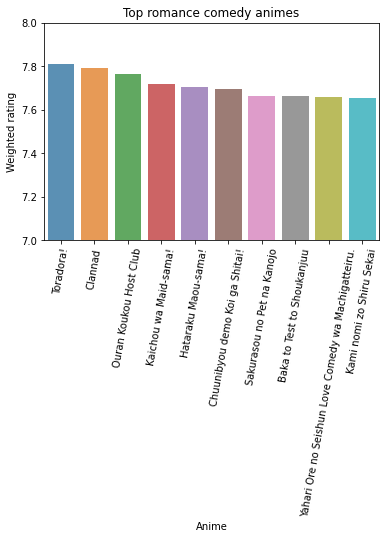

In [27]:
plt.figure(figsize=(6,4))
sns.barplot(filtered['name'], filtered['wr'], alpha=0.8)
#sns.color_palette("tab10")
plt.title('Top romance comedy animes')
plt.ylabel('Weighted rating')
plt.xlabel('Anime')
plt.ylim(7, 8)
plt.xticks(rotation=80)
plt.show()

In [28]:
# Top 10 TV type anime

filtered_TV = df_popular[df_popular['type'] == "TV"].sort_values(by=['wr'], ascending=False)
filtered_TV = filtered_TV.head(10)
filtered_TV.head()

,anime_id,ratings_count,ratings_average,wr,name,genre,type,members,episodes
0,5114,21494,9,8.681608,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,793665,64
24574,2904,21124,9,8.676795,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,572888,25
48816,9253,17151,9,8.614153,Steins;Gate,"Sci-Fi, Thriller",TV,673572,24
68099,4181,15518,9,8.580756,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,456749,24
85953,11061,7477,9,8.269341,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power",TV,425855,148


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


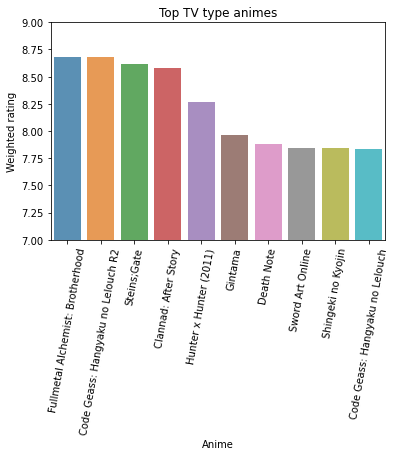

In [29]:
plt.figure(figsize=(6,4))
sns.barplot(filtered_TV['name'], filtered_TV['wr'], alpha=0.8)
#sns.color_palette("tab10")
plt.title('Top TV type animes')
plt.ylabel('Weighted rating')
plt.xlabel('Anime')
plt.ylim(7, 9)
plt.xticks(rotation=80)
plt.show()